In [ ]:
from keras.layers.core.dropout import Dropout
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
import cv2

170508288/170498071 [==============================] - 2s 0us/step


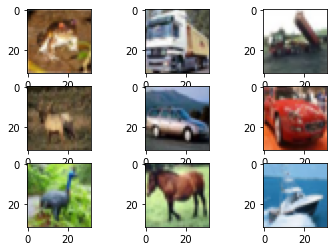

Kích thước x_train:  (50000, 32, 32, 3)
Kích thước y_train:  (50000, 1)
Kích thước x_test:  (10000, 32, 32, 3)
Kích thước y_test:  (10000, 1)


In [ ]:
#Chia dữ liệu
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
plt.show()
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

In [ ]:
#Chuẩn hóa dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (50000, 32, 32, 3)
Kích thước y_train:  (50000, 10)
Kích thước x_test:  (10000, 32, 32, 3)
Kích thước y_test:  (10000, 10)


In [ ]:
#tao 
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform',
          padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform',
          padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same',input_shape=(32,32,3)))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same',input_shape=(32,32,3)))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
#tao modle
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])

#train 
history = model.fit(x_train, y_train, batch_size=128,epochs=100,
                    validation_data = (x_test, y_test), verbose=1)      
#luu model
model.save('NHT_Cifar10.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
391/391 [==============================] - 14s 35ms/step - loss: 1.6729 - accuracy: 0.3888 - val_loss: 1.3893 - val_accuracy: 0.4983
Epoch 2/100
391/391 [==============================] - 13s 33ms/step - loss: 1.2016 - accuracy: 0.5696 - val_loss: 1.1270 - val_accuracy: 0.6016
Epoch 3/100
391/391 [==============================] - 13s 33ms/step - loss: 0.9650 - accuracy: 0.6582 - val_loss: 0.9268 - val_accuracy: 0.6761
Epoch 4/100
391/391 [==============================] - 13s 35ms/step - loss: 0.8071 - accuracy: 0.7178 - val_loss: 0.8892 - val_accuracy: 0.6875
Epoch 5/100
391/391 [==============================] - 13s 33ms/step - loss: 0.6876 - accuracy: 0.7604 - val_loss: 0.8077 - val_accuracy: 0.7269
Epoch 6/100
391/391 [==============================] - 13s 34ms/step - loss: 0.5902 - accuracy: 0.7938 - val_loss: 0.7969 - val_accuracy: 0.7318
Epoch 7/100
391/391 [==============================] - 13s 33ms/step - loss: 0.5025 - accuracy: 0.8243 - val_loss: 0.8165 - val_ac

In [ ]:
#load model 
from tensorflow import keras
model = keras.models.load_model('NHT_Cifar10.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [ ]:
#ve do thi
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

Sai số kiểm tra là:  2.348778009414673
Độ chính xác kiểm tra là:  0.7634000182151794


NameError: ignored

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
class_names=['concho','conmeo','conga']

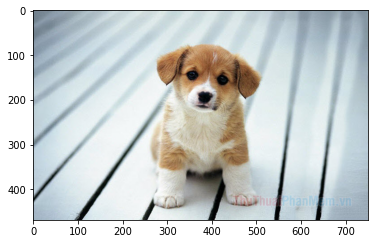

In [ ]:
img_path = '../content/concho.jpg'
plt.imshow(load_img(img_path))
img = cv2.imread(img_path)
new_img = cv2.resize(img, (256, 256))
new_img = np.reshape(new_img, [1, 256, 256, 3])

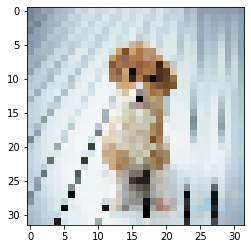

In [ ]:
# example of converting an image with the Keras API
from keras.preprocessing import image 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from json import load

img=load_img('concho.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
convat=np.argmax(model.predict(img),axis=1)

In [ ]:
pred = model.predict(img)
print(np.argmax(pred))
if(convat>0):
  print("concho");

3
concho
